# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

## Задание 1. Первичный анализ данных c Pandas

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize

Считаем данные по росту и весу (*weights_heights.csv*) в объект Pandas DataFrame:

In [2]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

**[2].** Посмотрим на первые 5 записей с помощью метода head Pandas DataFrame. Нарисуем гистограмму распределения веса с помощью метода plot Pandas DataFrame. Сделаем гистограмму зеленой и подпишем картинку.

In [3]:
data.head()

Height    Weight
Index                    
1      65.78331  112.9925
2      71.51521  136.4873
3      69.39874  153.0269
4      68.21660  142.3354
5      67.78781  144.2971

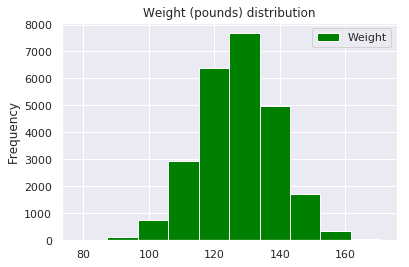

In [4]:
data.plot(
    y='Weight', 
    kind='hist', 
    color='green',  
    title='Weight (pounds) distribution', 
    )

Создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и *lambda*-функций Python.

In [5]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [6]:
data['BMI'] = data.apply(
    lambda row: make_bmi(row['Height'], row['Weight']), 
    axis=1, 
    )

data.head()

Height    Weight        BMI
Index                               
1      65.78331  112.9925  18.357573
2      71.51521  136.4873  18.762577
3      69.39874  153.0269  22.338895
4      68.21660  142.3354  21.504526
5      67.78781  144.2971  22.077581

**[3].** Построим картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используем метод *pairplot* библиотеки Seaborn.

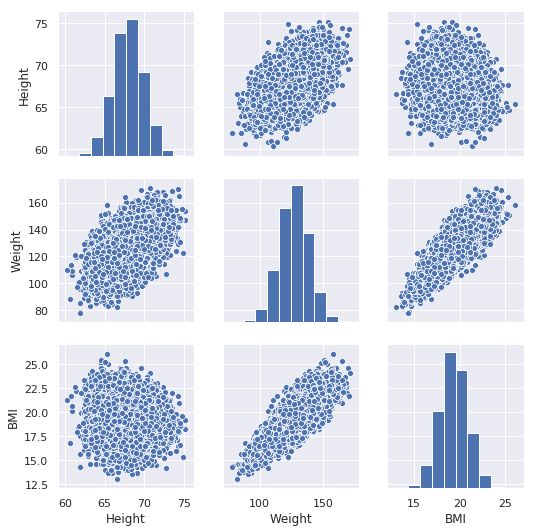

In [7]:
sns.pairplot(data)

**[4]**. Создадим в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Построим «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используем метод *boxplot* библиотеки Seaborn и метод *apply* Pandas DataFrame. Подпишем оси соответствующими метками «Рост» и «Весовая категория».

In [8]:
def weight_category(weight):
    if weight<120:
        return 1
    elif weight>=150:
        return 3
    else:
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
data.head()

Height    Weight        BMI  weight_cat
Index                                           
1      65.78331  112.9925  18.357573           1
2      71.51521  136.4873  18.762577           2
3      69.39874  153.0269  22.338895           3
4      68.21660  142.3354  21.504526           2
5      67.78781  144.2971  22.077581           2

Text(0,0.5,u'\u0420\u043e\u0441\u0442')

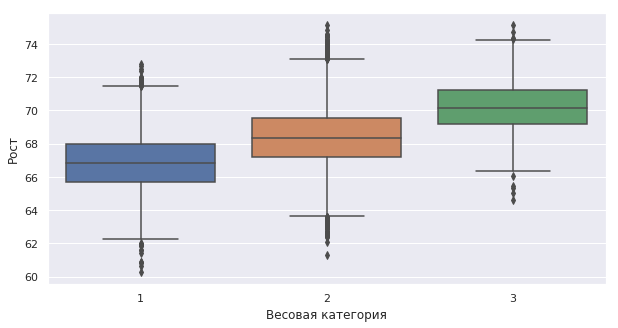

In [9]:
plt.figure(figsize=(10, 5))

sns.boxplot(
    x='weight_cat', 
    y='Height', 
    data=data, 
    )

plt.xlabel(u'Весовая категория')
plt.ylabel(u'Рост')

**[5].** Построим scatter plot зависимости роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*. Подпишем картинку.

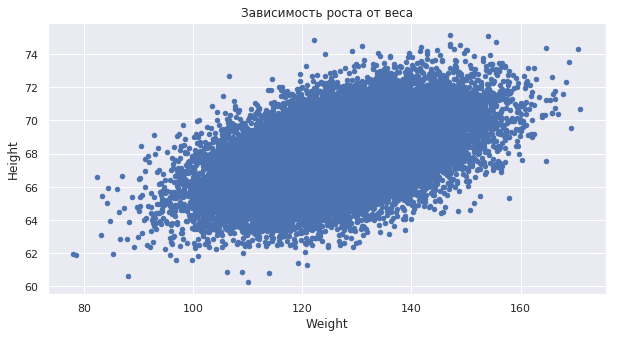

In [10]:
data.plot(
    x='Weight', 
    y='Height', 
    kind='scatter', 
    figsize=(10, 5), 
    title=u'Зависимость роста от веса', 
    )

## Задание 2. Минимизация квадратичной ошибки

**[6].** Напишем функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [11]:
def error(w0, w1):
    sum = 0
    n = data.shape[0]
    for i in range(1, n+1):
        x, y = data['Weight'][i], data['Height'][i]
        sum += (y - (w0 + w1*x))**2
    return sum

**[7].** Проведем на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров $(w_0, w_1) = (60, 0.05)$ и $(w_0, w_1) = (50, 0.16)$. Используем метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишем оси и график.

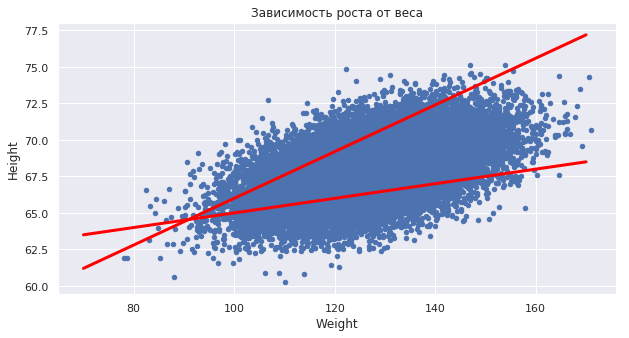

In [12]:
data.plot(
    x='Weight', 
    y='Height', 
    kind='scatter', 
    figsize=(10, 5), 
    title=u'Зависимость роста от веса', 
    )

x = np.linspace(70, 170)

plt.plot(
    x, 60 + 0.05*x, 
    x, 50 + 0.16*x, 
    c='red', lw=3, 
    )

**[8].** Построим график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишем оси и график.

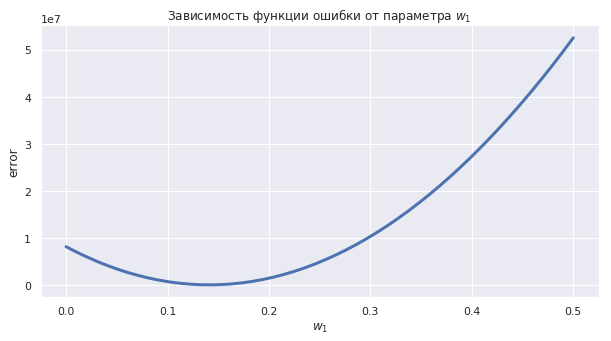

In [13]:
plt.figure(figsize=(10, 5))
plt.title(u'Зависимость функции ошибки от параметра $w_1$')
plt.xlabel('$w_1$')
plt.ylabel('error')

x = np.linspace(0, 0.5)
plt.plot(x, error(50, x), lw=3)

**[9].** С помощью метода *minimize_scalar* из *scipy.optimize* найдем минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведем на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное оптимальное значение параметра $w_1$.

In [14]:
minim_scal = minimize_scalar(
    lambda x: error(50, x), 
    bounds=(-5, 5), 
    method='bounded', 
    )

minim_scal

     fun: 79512.21728699488
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 0.1410920372883444

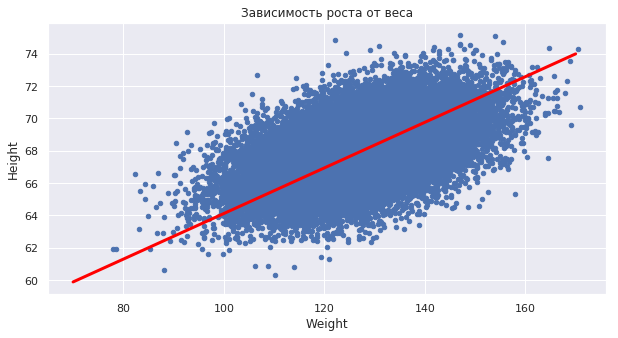

In [15]:
data.plot(
    x='Weight', 
    y='Height', 
    kind='scatter', 
    figsize=(10, 5), 
    title=u'Зависимость роста от веса', 
    )

x = np.linspace(70, 170)
w1_opt = minim_scal.x

plt.plot(x, 50 + w1_opt * x, c='red', lw=3)

**[10].** Построим 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишем ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

Text(0.5,0,'Error')

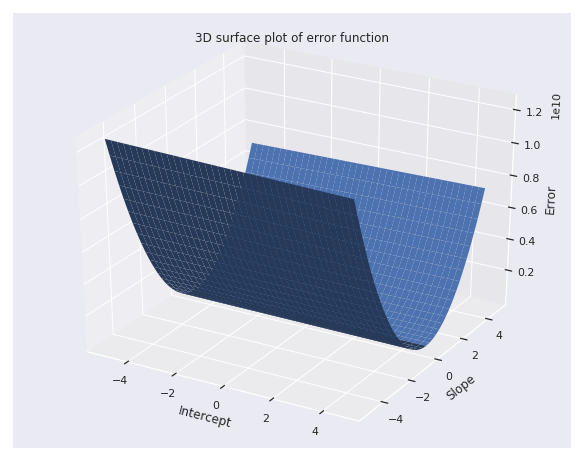

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = error(X, Y)

surf = ax.plot_surface(
    X, Y, Z, 
    edgecolor='none', 
    )

ax.set_title('3D surface plot of error function')
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')

**[11].** С помощью метода *minimize* из scipy.optimize найдем минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используем метод оптимизации L-BFGS-B. Проведем на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишем оси и график.

In [17]:
minim = minimize(
    lambda w: error(w[0], w[1]), 
    x0 = (0, 0), 
    method='L-BFGS-B', 
    bounds=((-100, 100), (-5, 5)), 
    )

minim

      fun: 67545.28708529084
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.04802132, -0.93132257])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 51
      nit: 12
   status: 0
  success: True
        x: array([57.57171454,  0.08200697])

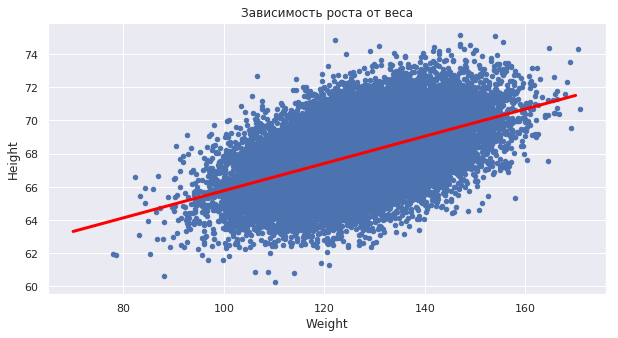

In [18]:
data.plot(
    x='Weight', 
    y='Height', 
    kind='scatter', 
    figsize=(10, 5), 
    title=u'Зависимость роста от веса', 
    )

x = np.linspace(70, 170)
w_opt = minim.x

plt.plot(x, w_opt[0] + w_opt[1] * x, c='red', lw=3)